In [1]:
import tensorflow as tf
import os

In [312]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras.utils
import cv2
import imghdr

In [3]:
i=0
txt = 'source data/carbon/frame{}.jpg'
img_list = []

for i in range(1752) :
    img = cv2.imread(txt.format(i))
    img_list.append(img.flatten())
    


In [4]:
img_list[0].shape

(147600,)

In [5]:
X = np.array(img_list)
np.save('processed_205x240_image.npy',X/255,allow_pickle=True)
X = np.load('processed_205x240_image.npy',allow_pickle=True)    
    

In [6]:
X[0].shape

(147600,)

In [7]:
import pandas as pd

In [8]:
dataset = pd.read_csv('carbonData.csv')
y=dataset["CO2 conc outlet"][:1752]
Y=np.array(y,dtype=np.float32).reshape((1752,1))


In [10]:
Y[0]

array([0.037], dtype=float32)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_test = X[1500:]
Y_test = Y[1500:]
X_train, X_val, Y_train, Y_val = train_test_split(X[:1500], Y[:1500], test_size=0.15, random_state=13)

img_rows, img_cols = 205, 240
input_shape = (img_rows, img_cols, 3)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)

X_test.shape


(252, 205, 240, 3)

In [13]:
Y_train.shape

(1275, 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))
learning_rate = 0.001

model.compile(loss = categorical_crossentropy,
              optimizer = Adam(learning_rate),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 203, 238, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 101, 119, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 99, 117, 32)       4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 49, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 47, 56, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 28, 16)      

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
#Define a Convolutional Neural Network Model
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
#model.add(Dense(n_classes, activation='softmax'))
model.add(Dense(1, activation='relu'))
learning_rate = 0.001
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(learning_rate),
              metrics=['accuracy'])
model.summary()

In [19]:
save_at = "model.hdf5"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

In [20]:
history = model.fit( X_train, Y_train, 
                    epochs = 5, batch_size = 16, 
                    callbacks=[save_best], verbose=1, 
                    validation_data = (X_val, Y_val))

Epoch 1/5
80/80 [==============================] - 17s 200ms/step - loss: 2.0426e-08 - accuracy: 0.0000e+00 - val_loss: 2.0650e-08 - val_accuracy: 0.0000e+00
Epoch 2/5
80/80 [==============================] - 15s 193ms/step - loss: 2.0426e-08 - accuracy: 0.0000e+00 - val_loss: 2.0650e-08 - val_accuracy: 0.0000e+00
Epoch 3/5
80/80 [==============================] - 15s 191ms/step - loss: 2.0426e-08 - accuracy: 0.0000e+00 - val_loss: 2.0650e-08 - val_accuracy: 0.0000e+00
Epoch 4/5
80/80 [==============================] - 16s 201ms/step - loss: 2.0426e-08 - accuracy: 0.0000e+00 - val_loss: 2.0650e-08 - val_accuracy: 0.0000e+00
Epoch 5/5
80/80 [==============================] - 17s 209ms/step - loss: 2.0426e-08 - accuracy: 0.0000e+00 - val_loss: 2.0650e-08 - val_accuracy: 0.0000e+00


In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

In [24]:
Y_pred = model.predict(X_test)

8/8 [==============================] - 1s 63ms/step


In [25]:
Y_pred[0][0]


0.1953628

In [26]:
df=pd.DataFrame({'Actually':Y_test.flatten(),'Predicted':Y_pred.flatten()})

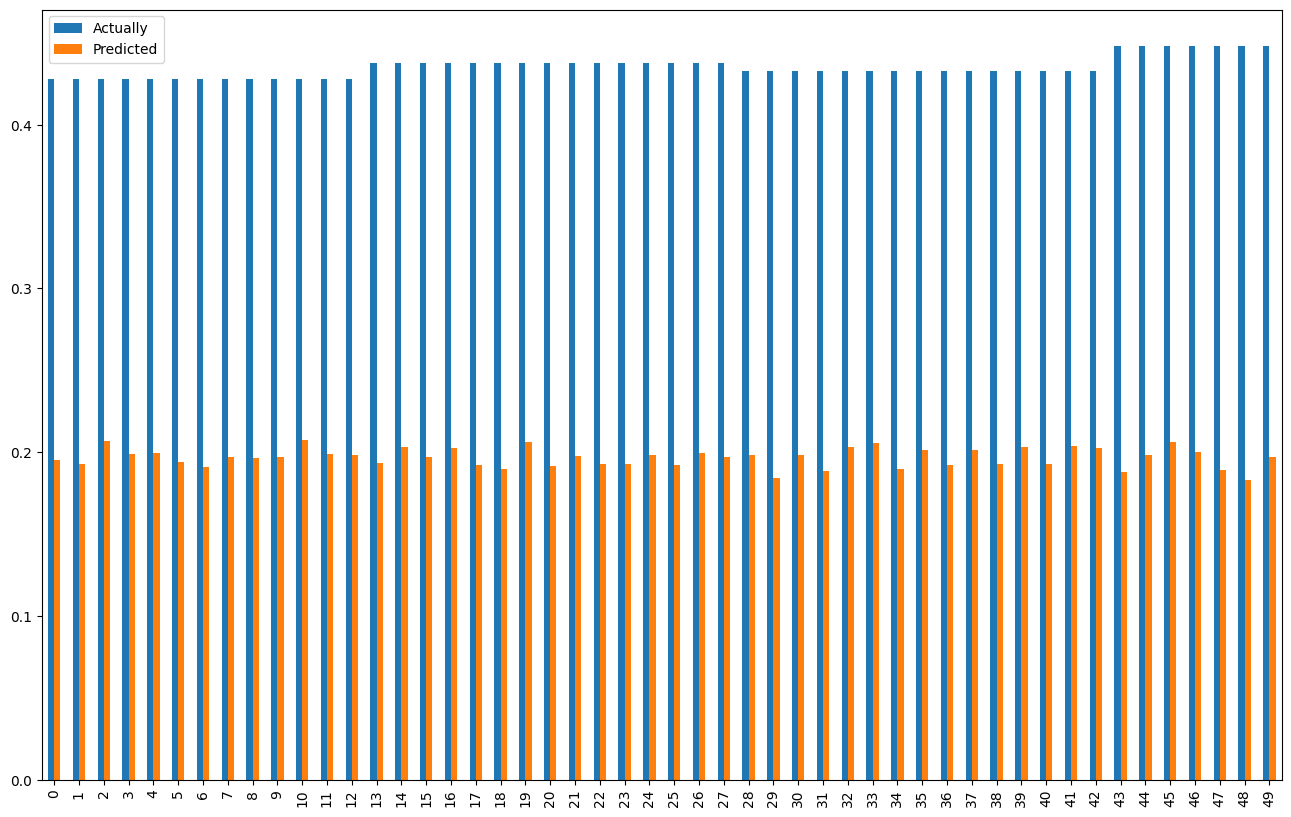

In [27]:
df1=df.head(50)
df1.plot(kind="bar",figsize=(16,10))
plt.show()